# CSCI-UA 0473 - Introduction to Machine Learning
## Monday, March 25, 2019

In this part of the HW you need to implement PCA of the 20newsgroups dataset.

You can use TFIDF as a feature extractor for you examples. Make is as simple as possible from the feature extraction perspective (simple extraction is already done for you here).

You can get 10 points max for this task. Your notebook should be *fully* reproducible to get full points.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## 1. Data (0 points)

In [14]:
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

In [15]:
tfidf_vectorizer = TfidfVectorizer(min_df=30)
X = tfidf_vectorizer.fit_transform(newsgroups_train.data)
y = newsgroups_train.target

## 2. PCA - Principal Components Analysis (5 points)

In [16]:
# <TODO> import proper class
from sklearn.decomposition import PCA

# <TODO> uncomment below. Choose q
# Choosing higher q's will give the same result for the first values of explained variance
q = 20

# <TODO> uncomment below. initialize PCA model
pca = PCA(n_components=q, random_state = 0)

# <TODO> uncomment below. train PCA model and retrieve the low-dimension projection of X.
X = X.todense()
pca.fit(X)
Z = pca.transform(X)

# <TODO> uncomment below. retrieve explained variance ratio
var_ratio = pca.explained_variance_ratio_

In [17]:
print ('Ratio of variance explained: ', var_ratio)

Ratio of variance explained:  [0.03080441 0.01712901 0.01155381 0.00999047 0.00883965 0.00802021
 0.00711113 0.00647313 0.00613121 0.00606099 0.00576901 0.00535498
 0.00495354 0.00490519 0.00483659 0.00467101 0.00457188 0.00446732
 0.00432012 0.00425026]


In [18]:
print ('Original Shape: ', X.shape)
print ('Reduced Shape: ', Z.shape)

Original Shape:  (2369, 1771)
Reduced Shape:  (2369, 20)


## 3. Visualizing the reduced data points (2 points)

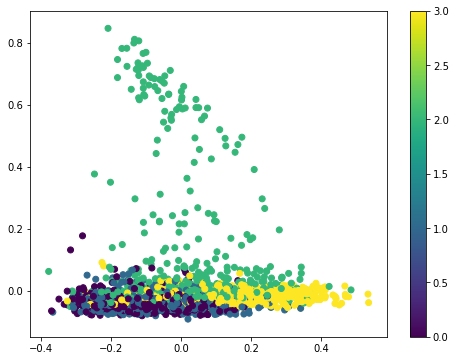

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], c = y)
plt.colorbar()

## 4. Analysis (3 points)

In [20]:
# <TODO> uncomment below. Retrieve W
W = pca.components_

In [21]:
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])

for i in range(q):
    insens_idx = np.argsort(W[i])

    print ('TOPIC ' + str(i))
    print (' '.join([invocab[w_ix] for w_ix in insens_idx[-10:]]) + '\n')

TOPIC 0
not we in god is and to that of the

TOPIC 1
n3jxp chastity shameful cadre dsl cs gordon banks geb pitt

TOPIC 2
not hell christians faith that his jesus he we god

TOPIC 3
uga georgia apple ai god university of mac edu the

TOPIC 4
his god dod sun in he of was the com

TOPIC 5
steve superstition chinese is com sensitivity of dyer food msg

TOPIC 6
michael university athens mcovingt covington my uga georgia ai edu

TOPIC 7
athens mcovingt covington msg the michael uga georgia ai you

TOPIC 8
programs athens mcovingt covington are uga com georgia ai of

TOPIC 9
nj my his she apple was behanna nec com he

TOPIC 10
chris article bike state harvard nj cwru behanna nec edu

TOPIC 11
zx uk bnr ca msg chris bike nj nec behanna

TOPIC 12
hp my ca com uk bnr that we it is

TOPIC 13
nj east ed her she sun behanna nec ac uk

TOPIC 14
her cwru the bike east msg god to sun we

TOPIC 15
bc cwru freenet nasa you gov her she bnr ca

TOPIC 16
indiana org harvard is drive dyer scsi gov jim nasa
